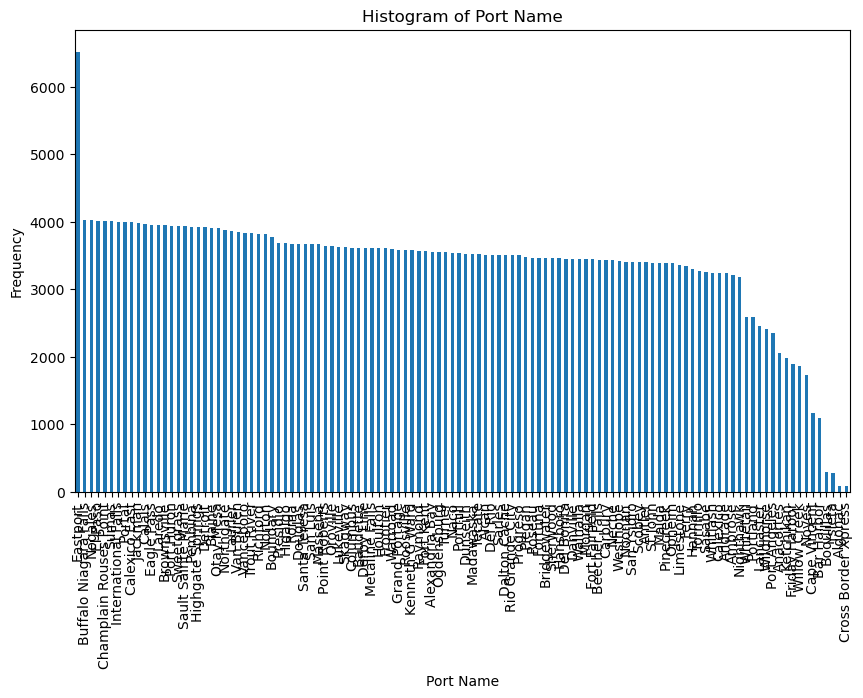

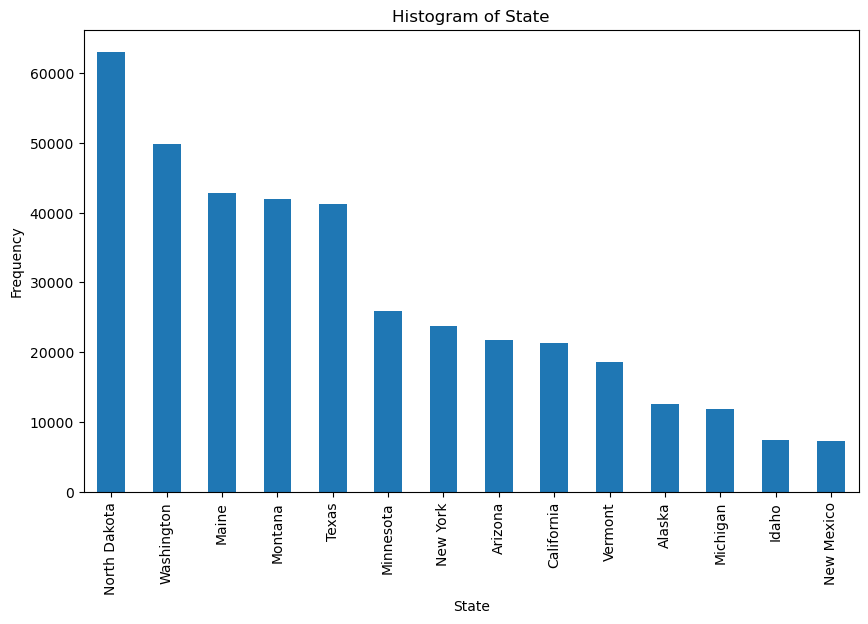

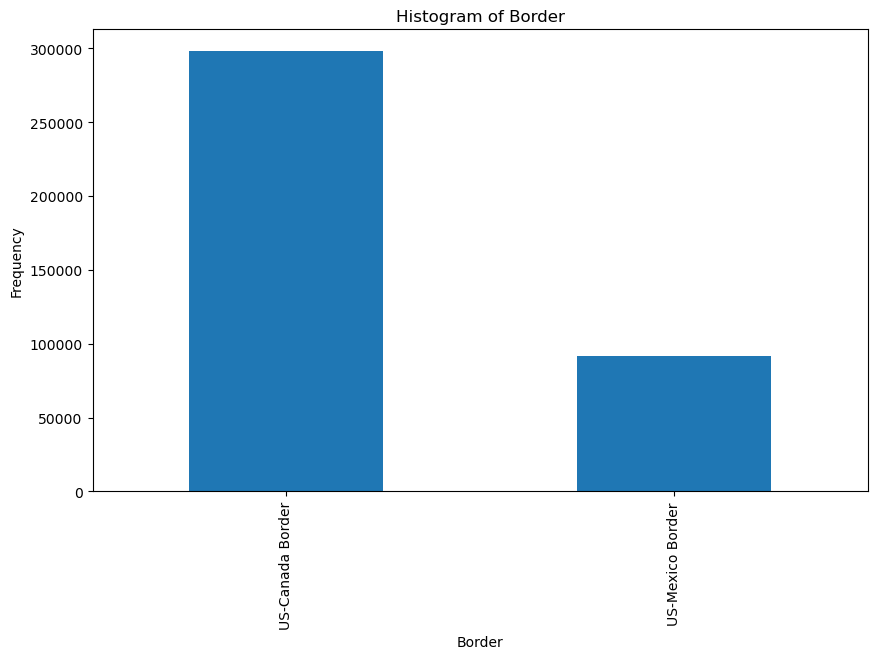

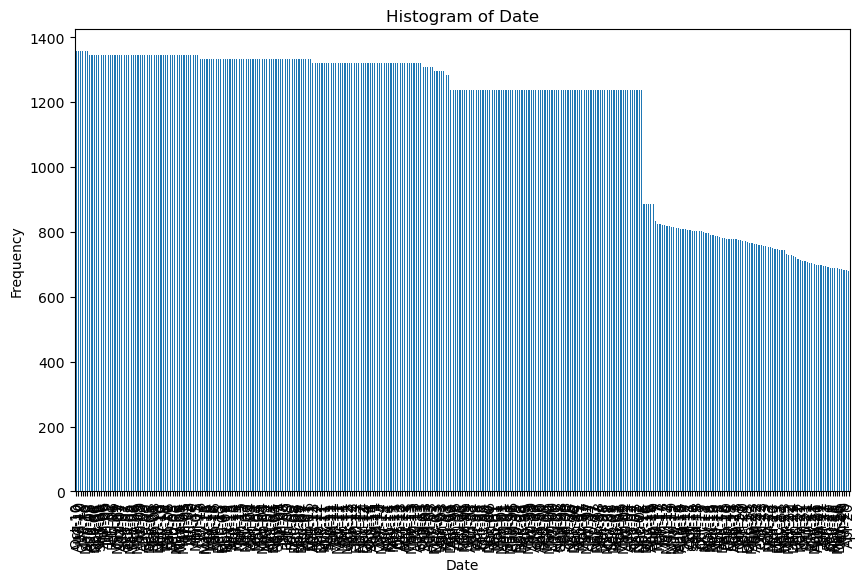

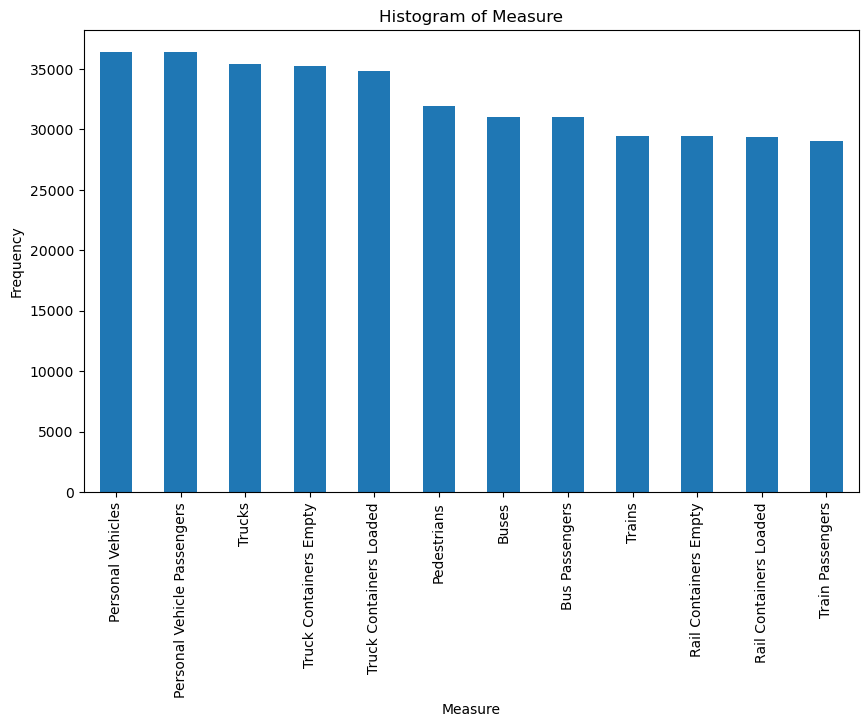

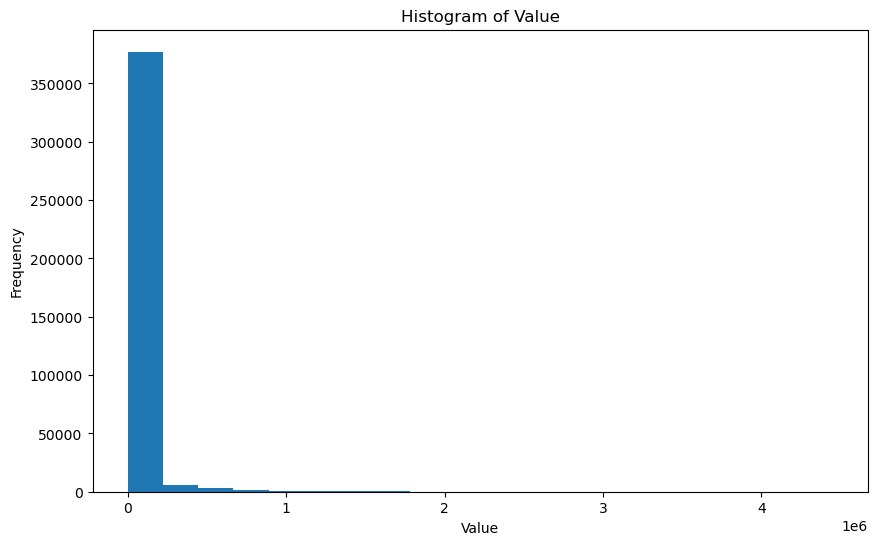

In [1]:
# 1. Histogram of each variable

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Border Crossing Entry Data.csv')

# Select the 6 variables for analysis
variables = ['Port Name', 'State', 'Border', 'Date', 'Measure', 'Value']

# Create histograms for each variable
for var in variables:
    plt.figure(figsize=(10, 6))
    if var == 'Value':
        # For the 'Value' variable, plot a histogram with bins to visualize the distribution
        data[var].plot(kind='hist', bins=20)
    else:
        data[var].value_counts().plot(kind='bar')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [4]:
# 2. Other descriptive characteristics: Mean, Mode, Spread, and Tails.

# Select the 6 variables for analysis
variables = ['Port Name', 'State', 'Border', 'Date', 'Measure', 'Value']

# Calculate descriptive characteristics for each variable
descriptive_stats = {}

for var in variables:
    if data[var].dtype in ['int64', 'float64']:
        mean_val = data[var].mean()
        mode_val = data[var].mode().values[0] if not data[var].mode().empty else None
        spread_val = data[var].max() - data[var].min()
        tail_values = data[var].quantile([0.25, 0.75]).values
        descriptive_stats[var] = {
            'Mean': mean_val,
            'Mode': mode_val,
            'Spread': spread_val,
            'Tails': tail_values
        }

# Print the descriptive statistics for each variable
for var, stats in descriptive_stats.items():
    print(f"Variable: {var}")
    print(f"Mean: {stats['Mean']}")
    print(f"Mode: {stats['Mode']}")
    print(f"Spread: {stats['Spread']}")
    print(f"Tails (Q1, Q3): {stats['Tails']}\n")

Variable: Value
Mean: 28667.368962843924
Mode: 0
Spread: 4447374
Tails (Q1, Q3): [   0. 2903.]



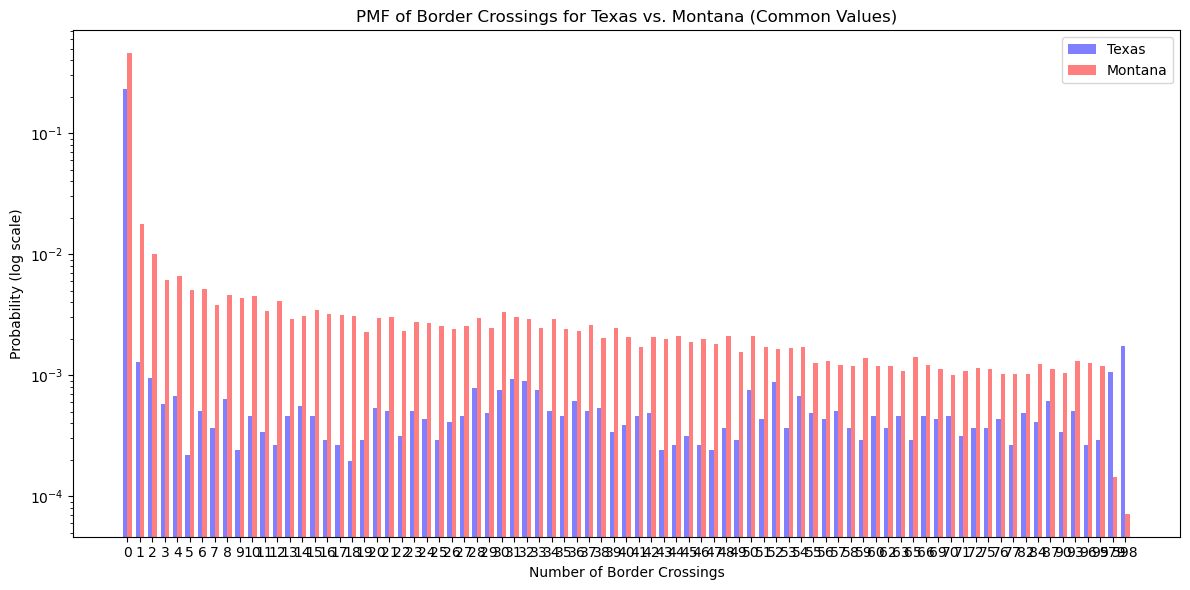

In [25]:
# 3. Comparing two scenarios using a PMF.

import numpy as np

# Filter the dataset for Texas and Montana
texas_data = data[data['State'] == 'Texas']
montana_data = data[data['State'] == 'Montana']

# Calculate PMFs for Texas and Montana
texas_pmf = texas_data['Value'].value_counts(normalize=True).sort_index()
montana_pmf = montana_data['Value'].value_counts(normalize=True).sort_index()

# Merge the PMFs into a single DataFrame
pmf_df = pd.concat([texas_pmf, montana_pmf], axis=1, keys=['Texas', 'Montana'])

# Filter out values with low probabilities for better visualization
threshold = 0.001  
common_values = pmf_df[(pmf_df['Texas'] > threshold) | (pmf_df['Montana'] > threshold)]

# Plot the PMFs for Texas and Montana on the same plot with distinct colors
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(common_values))
plt.bar(index, common_values['Texas'], bar_width, alpha=0.5, color='b', label='Texas')
plt.bar(index + bar_width, common_values['Montana'], bar_width, alpha=0.5, color='r', label='Montana')
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.xlabel('Number of Border Crossings')
plt.ylabel('Probability (log scale)')
plt.title('PMF of Border Crossings for Texas vs. Montana (Common Values)')
plt.xticks(index + bar_width / 2, common_values.index)
plt.legend()
plt.tight_layout()
plt.show()

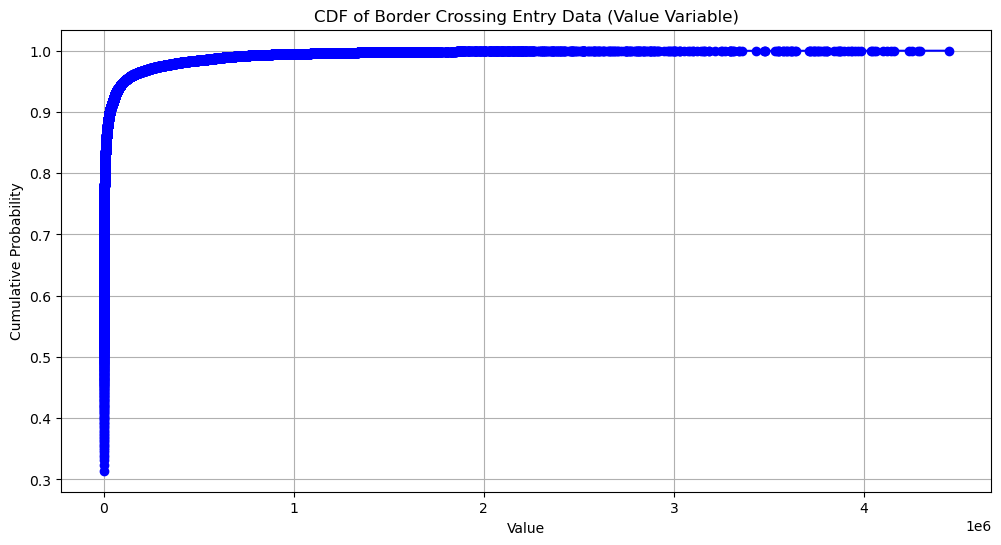

In [26]:
# 4. Creating a CDF

# Calculate the CDF for the 'Value' variable
cdf = data['Value'].value_counts(normalize=True).sort_index().cumsum()

# Plot the CDF
plt.figure(figsize=(12, 6))
plt.plot(cdf.index, cdf.values, marker='o', linestyle='-', color='b')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Border Crossing Entry Data (Value Variable)')
plt.grid(True)
plt.show()

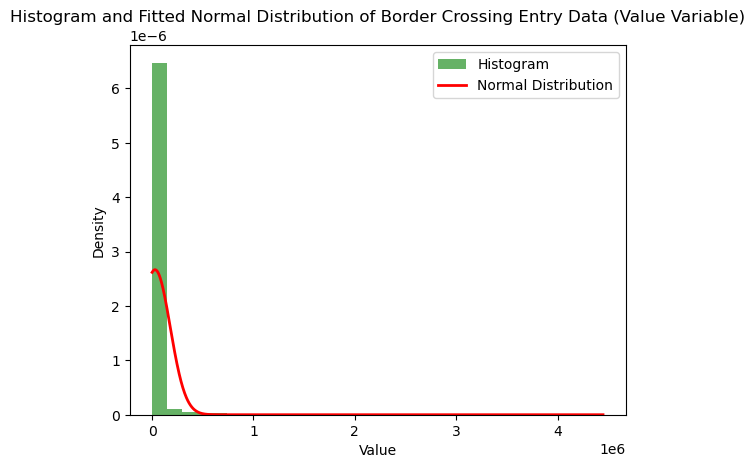

KS Statistic: 0.4240541822952793, P-value: 0.0


In [28]:
# 5. Analytical distribution

from scipy.stats import norm
from scipy import stats

# Fit a normal distribution to the 'Value' variable
mu, std = data['Value'].mean(), data['Value'].std()
dist = norm(mu, std)

# Generate values for the x-axis
x = np.linspace(data['Value'].min(), data['Value'].max(), 1000)

# Plot the histogram of 'Value' variable
plt.hist(data['Value'], bins=30, density=True, alpha=0.6, color='g', label='Histogram')

# Plot the fitted normal distribution
plt.plot(x, dist.pdf(x), 'r-', lw=2, label='Normal Distribution')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and Fitted Normal Distribution of Border Crossing Entry Data (Value Variable)')
plt.legend()

# Show plot
plt.show()

# Perform Kolmogorov-Smirnov test to evaluate the fit
ks_statistic, ks_p_value = stats.kstest(data['Value'], 'norm', args=(mu, std))
print(f"KS Statistic: {ks_statistic}, P-value: {ks_p_value}")

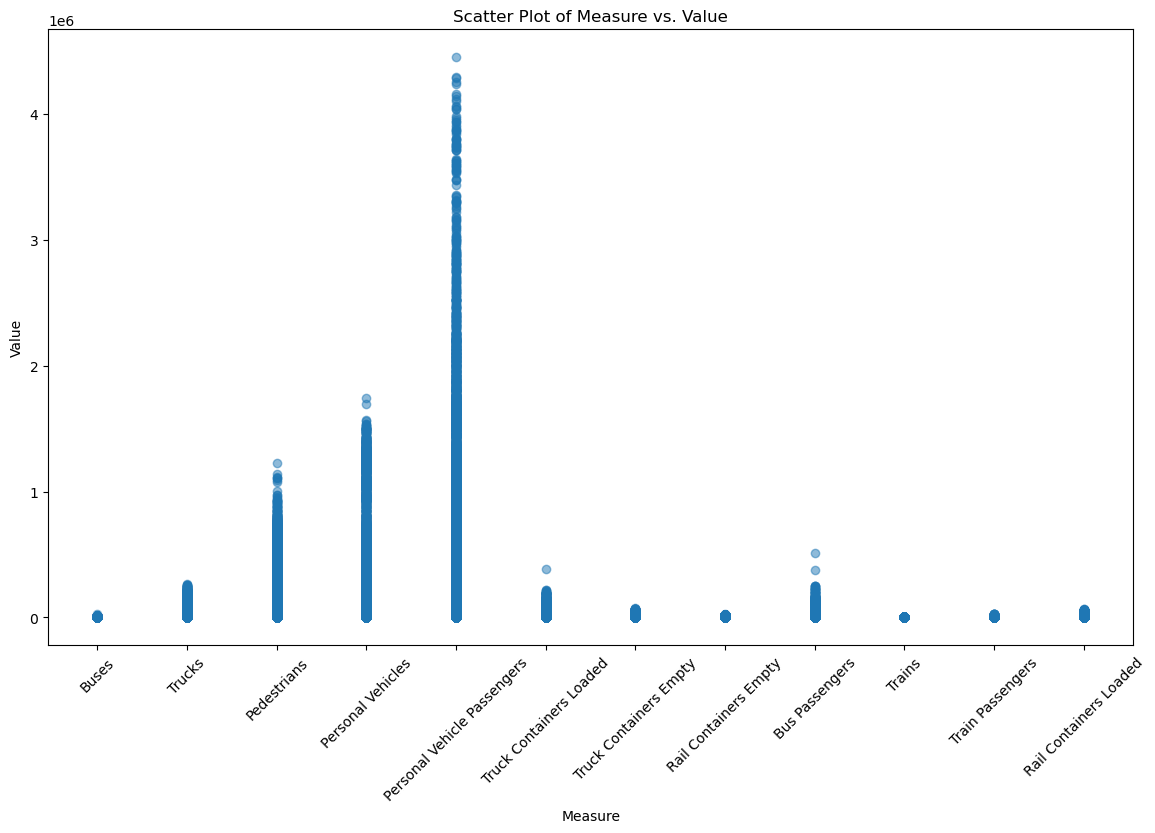

Pearson's correlation coefficient: -0.09941751461149709
P-value: 0.0


In [47]:
# 6. Scatterplot

from scipy.stats import pearsonr

# Select two variables for comparison
x_variable = 'Measure'
y_variable = 'Value'

# Create scatter plot with numeric values
plt.figure(figsize=(14, 8))
plt.scatter(data[x_variable], data[y_variable], alpha=0.5)
plt.xlabel('Measure')
plt.ylabel('Value')
plt.title('Scatter Plot of Measure vs. Value')
plt.xticks(rotation=45)
plt.show()

# Mapping dictionary for converting measures to numbers
measure_mapping = {
    'Buses': 1,
    'Trucks': 2,
    'Pedestrians': 3,
    'Personal Vehicles': 4,
    'Personal Vehicle Passengers': 5,
    'Truck Containers Loaded': 6,
    'Truck Containers Empty': 7,
    'Rail Containers Empty': 8,
    'Bus Passengers': 9,
    'Trains': 10,
    'Train Passengers': 11,
    'Rail Containers Loaded': 12
}

# Convert 'Measure' column to numbers
data['Measure'] = data['Measure'].map(measure_mapping)

# Calculate Pearson's correlation coefficient between 'Measure' and 'Value'
correlation_coefficient, p_value = pearsonr(data['Measure'], data['Value'])
print(f"Pearson's correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

In [48]:
# 7. Analysis of Variance (ANOVA)

# Filter data for the four states/borders
texas_data = data[data['State'] == 'Texas']['Value']
arizona_data = data[data['State'] == 'Arizona']['Value']
montana_data = data[data['State'] == 'Montana']['Value']
north_dakota_data = data[data['State'] == 'North Dakota']['Value']

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(texas_data, arizona_data, montana_data, north_dakota_data)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference in means is statistically significant.")
else:
    print("The difference in means is not statistically significant.")

F-statistic: 4130.727805549543
P-value: 0.0
The difference in means is statistically significant.


In [58]:
# 8. Regression Analysis

import statsmodels.api as sm

# Select relevant columns for the analysis
data = data[['Value', 'State_Alaska', 'State_Arizona', 'State_California',
             'State_Idaho', 'State_Maine', 'State_Michigan', 'State_Minnesota',
             'State_Montana', 'State_New Mexico', 'State_New York',
             'State_North Dakota', 'State_Texas', 'State_Vermont',
             'State_Washington']]

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Define the dependent variable (y) and the independent variables (X)
X = data.drop('Value', axis=1)  # Independent variables
y = data['Value']  # Dependent variable

# Add a constant column to X
X = np.column_stack((np.ones(X.shape[0]), X))

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     2434.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:12:05   Log-Likelihood:            -5.1794e+06
No. Observations:              389546   AIC:                         1.036e+07
Df Residuals:                  389532   BIC:                         1.036e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.932e+04    266.125    110.186      0.0

In [54]:
print(data.columns)

Index(['Port Name', 'Port Code', 'Date', 'Value', 'Latitude', 'Longitude',
       'Point', 'State_Alaska', 'State_Arizona', 'State_California',
       'State_Idaho', 'State_Maine', 'State_Michigan', 'State_Minnesota',
       'State_Montana', 'State_New Mexico', 'State_New York',
       'State_North Dakota', 'State_Texas', 'State_Vermont',
       'State_Washington', 'Border_US-Canada Border',
       'Border_US-Mexico Border', 'Measure_1', 'Measure_2', 'Measure_3',
       'Measure_4', 'Measure_5', 'Measure_6', 'Measure_7', 'Measure_8',
       'Measure_9', 'Measure_10', 'Measure_11', 'Measure_12'],
      dtype='object')
